In [1]:
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/home/p/HiGHS/build/bin"
os.environ['GRB_LICENSE_FILE'] = '/opt/gurobi810/gurobi.lic'

In [2]:
from init import *

## Example 0: Simple example from README

In [7]:
wind = NodeScalableInputProfile(
    name="wind",
    input_flow=random_time_series(),
    costs=5,
    output_unit="MW",
)
demand = NodeFixOutputProfile(
    name="demand",
    inputs=[wind],
    input_commodities='electricity',
    output_unit='MW',
    costs=0,
    output_flow=random_time_series(),
)

network = Network(
    [
        wind,
        demand,
    ]
)


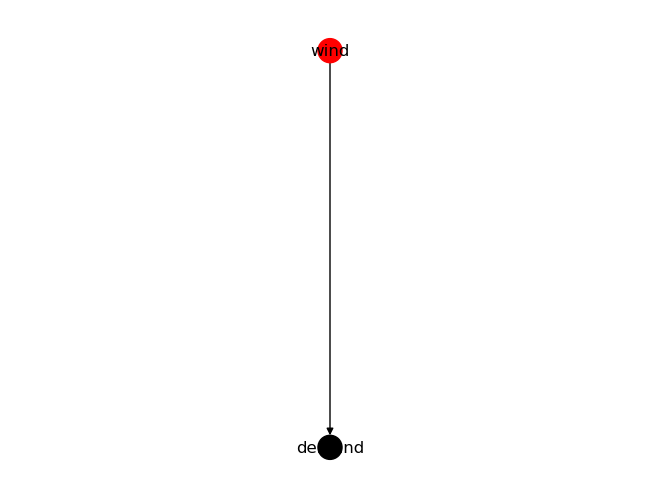

In [9]:
network.draw()

## Example 1: No central electricity node

In [10]:
solar_pv = NodeScalableInputProfile(
    name="solar_pv",
    input_flow=random_time_series(),
    costs=10,
    output_unit="MW",
)
wind = NodeScalableInputProfile(
    name="wind",
    input_flow=random_time_series(),
    costs=5,
    output_unit="MW",
)
co2 = NodeFixInputProfile(
    name="co2",
    costs=0,
    input_flow=random_time_series(),
    output_unit="t",
)

curtail = Node(
    name="curtail",
    inputs=[solar_pv, wind],
    input_commodities="electricity",
    costs=0,
    output_unit="t",
)
hydrogen = Node(
    name="hydrogen",
    inputs=[solar_pv, wind],
    input_commodities="electricity",
    costs=7,
    output_unit="t",
)
curtail_h2 = Node(
    name="curtail_h2",
    inputs=[hydrogen],
    input_commodities="hydrogen",
    costs=0,
    output_unit="t",
)

methanol_synthesis = Node(
    name="methanol_synthesis",
    inputs=[co2, hydrogen],
    input_commodities=["co2", "hydrogen"],
    costs=8,
    output_unit="t",
    input_proportions={"co2": 0.25, "hydrogen": 0.75},
)

network = Network(
    [
        solar_pv,
        wind,
        curtail,
        hydrogen,
        curtail_h2,
        co2,
        methanol_synthesis,
    ]
)


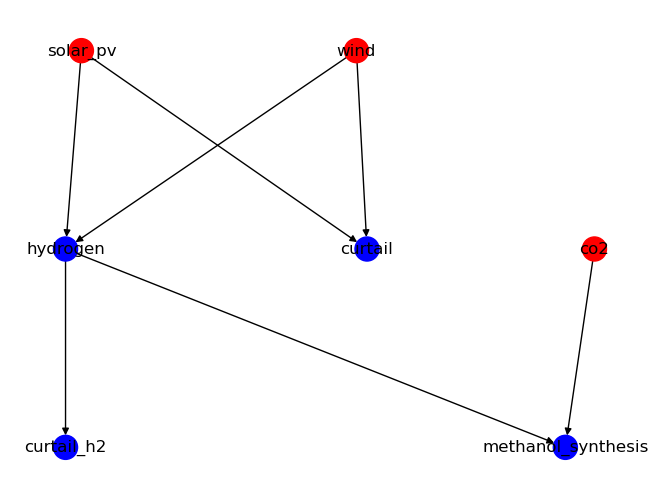

In [11]:
network.draw()

In [12]:
network.optimize('gurobi')

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-01
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 315360 rows, 262804 columns and 683280 nonzeros
Model fingerprint: 0x3a4e0510
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [5e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-05, 1e+00]
Presolve removed 315360 rows and 262804 columns
Presolve time: 0.26s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.7996016e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.41 seconds (0.32 work units)
Optimal objective  6.799601582e+01


In [13]:
network.model.solution

<xarray.Dataset>
Dimensions:                           (time: 8760, locations: 3)
Coordinates:
  * time                              (time) int64 0 1 2 3 ... 8757 8758 8759
  * locations                         (locations) int64 0 1 2
Data variables: (12/14)
    size_solar_pv                     float64 0.0
    size_wind                         float64 3.0
    flow_solar_pv_curtail             (time, locations) float64 0.0 0.0 ... 0.0
    flow_wind_curtail                 (time, locations) float64 0.0 0.0 ... 0.0
    flow_solar_pv_hydrogen            (time, locations) float64 0.0 0.0 ... 0.0
    flow_wind_hydrogen                (time, locations) float64 1.124 ... 0.5383
    ...                                ...
    flow_co2_methanol_synthesis       (time, locations) float64 0.3745 ... 0....
    flow_hydrogen_methanol_synthesis  (time, locations) float64 1.124 ... 0.5383
    size_methanol_synthesis           float64 4.0
    flow_curtail                      (time, locations) float64 0.0 0.0 ... 0.0
    flow_curtail_h2                   (time, locations) float64 0.0 0.0 ... 0.0
    flow_methanol_synthesis           (time, locations) float64 1.498 ... 0.7178

## Example 2: Central electricity node, no storage

In [7]:
solar_pv = NodeScalableInputProfile(
    name="solar_pv",
    input_flow=random_time_series(),
    costs=10,
    output_unit="MW",
)
wind = NodeScalableInputProfile(
    name="wind",
    input_flow=random_time_series(),
    costs=5,
    output_unit="MW",
)

electricity = Node(
    name="electricity",
    inputs=[solar_pv, wind],
    input_commodities="electricity",
    costs=0,
    output_unit="MW",
)

co2 = NodeFixInputProfile(
    name="co2",
    costs=0,
    input_flow=random_time_series(),
    output_unit="t",
)

curtail = Node(
    name="curtail",
    inputs=[electricity],
    input_commodities="electricity",
    costs=0,
    output_unit="MW",
)
hydrogen = Node(
    name="hydrogen",
    inputs=[electricity],
    input_commodities="electricity",
    costs=7,
    output_unit="t",
)
curtail_h2 = Node(
    name="curtail_h2",
    inputs=[hydrogen],
    input_commodities="hydrogen",
    costs=0,
    output_unit="t",
)

methanol_synthesis = Node(
    name="methanol_synthesis",
    inputs=[co2, hydrogen],
    input_commodities=["co2", "hydrogen"],
    costs=8,
    output_unit="t",
    input_proportions={"co2": 0.25, "hydrogen": 0.75},
)

network = Network(
    [
        solar_pv,
        wind,
        curtail,
        hydrogen,
        electricity,
        curtail_h2,
        co2,
        methanol_synthesis,
    ]
)


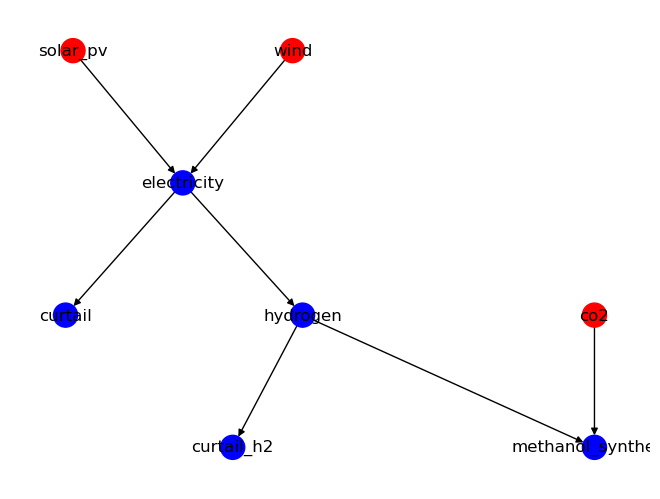

In [8]:
network.draw()

In [9]:
network.optimize('gurobi')

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 341640 rows, 262804 columns and 709560 nonzeros
Model fingerprint: 0x0cdaef38
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [5e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-05, 1e+00]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 341640 rows and 262804 columns
Presolve time: 0.47s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.7996016e+01   0.000000e+00   0.000000e+00      1s

Solved with dual simplex
Solved in 0 iterations and 0.75 seconds (0.33 work units)
Optimal objective  6.799601582e+01


In [10]:
network.model.solution

<xarray.Dataset>
Dimensions:                           (time: 8760, locations: 3)
Coordinates:
  * time                              (time) int64 0 1 2 3 ... 8757 8758 8759
  * locations                         (locations) int64 0 1 2
Data variables: (12/14)
    size_solar_pv                     float64 0.0
    size_wind                         float64 3.0
    flow_electricity_curtail          (time, locations) float64 0.0 0.0 ... 0.0
    flow_electricity_hydrogen         (time, locations) float64 1.124 ... 0.5383
    size_hydrogen                     float64 3.0
    flow_solar_pv_electricity         (time, locations) float64 0.0 0.0 ... 0.0
    ...                                ...
    flow_co2_methanol_synthesis       (time, locations) float64 0.3745 ... 0....
    flow_hydrogen_methanol_synthesis  (time, locations) float64 1.124 ... 0.5383
    size_methanol_synthesis           float64 4.0
    flow_curtail                      (time, locations) float64 0.0 0.0 ... 0.0
    flow_curtail_h2                   (time, locations) float64 0.0 0.0 ... 0.0
    flow_methanol_synthesis           (time, locations) float64 1.498 ... 0.7178

## Example 3: Central electricity node and storage

In [11]:
solar_pv = NodeScalableInputProfile(
    name="solar_pv",
    input_flow=random_time_series(),
    costs=10,
    output_unit="MW",
)
wind = NodeScalableInputProfile(
    name="wind",
    input_flow=random_time_series(),
    costs=5,
    output_unit="MW",
)

electricity = Node(
    name="electricity",
    inputs=[solar_pv, wind],
    input_commodities="electricity",
    costs=0,
    output_unit="MW",
    storage=Storage(costs=3, max_charging_speed=0.1, storage_loss=0.03, charging_loss=0.2),
)

co2 = NodeFixInputProfile(
    name="co2",
    costs=0,
    output_unit="t",
    input_flow=random_time_series(),
    storage=Storage(costs=200, max_charging_speed=0.2, storage_loss=0.0, charging_loss=0.001),
)

curtail = Node(
    name="curtail",
    inputs=[electricity],
    input_commodities="electricity",
    output_unit="MW",
    costs=0,
)

hydrogen = Node(
    name="hydrogen",
    inputs=[electricity],
    input_commodities="electricity",
    costs=7,
    output_unit="t",
    storage=Storage(costs=200, max_charging_speed=0.2, storage_loss=0.0, charging_loss=0.001),
)
curtail_h2 = Node(
    name="curtail_h2",
    inputs=[hydrogen],
    input_commodities="hydrogen",
    output_unit="t",
    costs=0,
)

methanol_synthesis = Node(
    name="methanol_synthesis",
    inputs=[co2, hydrogen],
    input_commodities=["co2", "hydrogen"],
    output_unit="t",
    costs=8,
    input_proportions={"co2": 0.25, "hydrogen": 0.75},
)

network = Network(
    [
        solar_pv,
        wind,
        curtail,
        hydrogen,
        electricity,
        curtail_h2,
        co2,
        methanol_synthesis,
    ]
)


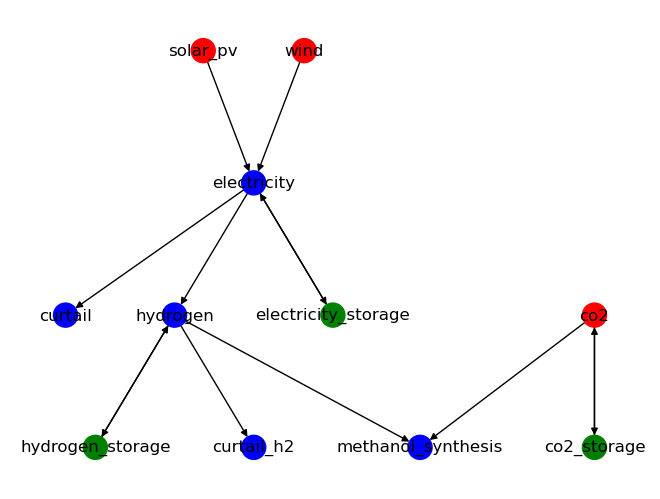

In [12]:
network.draw()

In [13]:
network.optimize('highs')

Running HiGHS 1.2.2 [date: 2022-09-04, git hash: 8701dbf19]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
473040 rows, 315367 cols, 1261431 nonzeros
446751 rows, 289077 cols, 1182573 nonzeros
Presolve : Reductions: rows 446751(-210249); columns 289077(-210250); elements 1182573(-473058)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 26283(13179.9) 2s
      27898     5.3047769955e+01 Pr: 39042(8233.87); Du: 0(1.43905e-05) 13s
      29335     5.3049064926e+01 Pr: 38681(8128.65); Du: 0(1.89935e-05) 19s
      30774     5.3050356008e+01 Pr: 38326(8021.45); Du: 0(2.33498e-05) 27s
      39925     5.3058837420e+01 Pr: 38543(6235.63); Du: 0(2.71108e-05) 32s
      64449     6.8075547467e+01 Pr: 21782(1293.7); Du: 0(2.53447e-05) 37s
      72091     6.8078225667e+01 Pr: 11182(376.043); Du: 0(1.89664e-05) 43s
      80595     6.7996015822e+01 Pr: 0(0) 45s
Solving th

In [14]:
network.optimize('gurobi')

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 657000 rows, 499327 columns and 1655631 nonzeros
Model fingerprint: 0x9cd47fd1
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [3e+00, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-05, 1e+00]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 78840 rows and 105120 columns
Presolve time: 2.50s
Presolved: 578160 rows, 394207 columns, 1497951 nonzeros

Ordering time: 0.14s

Barrier statistics:
 Dense cols : 7
 AA' NZ     : 1.367e+06
 Factor NZ  : 6.911e+06 (roughly 450 MB of memory)
 Factor Ops : 9.210e+07 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.73400237e+03  0.00000000e+00  3.83e+00 0.00e+00  1.67e+0

In [15]:
network.model.solution

<xarray.Dataset>
Dimensions:                           (time: 8760, locations: 3)
Coordinates:
  * time                              (time) int64 0 1 2 3 ... 8757 8758 8759
  * locations                         (locations) int64 0 1 2
Data variables: (12/26)
    size_solar_pv                     float64 0.0
    size_wind                         float64 3.0
    flow_electricity_curtail          (time, locations) float64 0.0 0.0 ... 0.0
    flow_electricity_hydrogen         (time, locations) float64 1.124 ... 0.5383
    size_storage_hydrogen             float64 0.0
    storage_level_hydrogen            (time, locations) float64 0.0 0.0 ... 0.0
    ...                                ...
    flow_co2_methanol_synthesis       (time, locations) float64 0.3745 ... 0....
    flow_hydrogen_methanol_synthesis  (time, locations) float64 1.124 ... 0.5383
    size_methanol_synthesis           float64 4.0
    flow_curtail                      (time, locations) float64 0.0 0.0 ... 0.0
    flow_curtail_h2                   (time, locations) float64 0.0 0.0 ... 0.0
    flow_methanol_synthesis           (time, locations) float64 1.498 ... 0.7178

## Example 4: Minimal example to test things

In [16]:
wind = NodeScalableInputProfile(name="wind", input_flow=const_time_series(.5), costs=1, output_unit='MW')
solar_pv = NodeScalableInputProfile(name="solar_pv", input_flow=const_time_series(.5), costs=20., output_unit='MW')


electricity = Node(
    name="electricity",
    inputs=[solar_pv, wind],
    input_commodities="electricity",
    costs=0,
    output_unit='MW',
)

co2 = NodeFixInputProfile(
    name="co2",
    input_flow=const_time_series(5),
    costs=0,
    output_unit='t',
)

# FIXME methanol synthesis does not work that way! we need hydrogen!
methanol_synthesis = Node(
    name="methanol_synthesis",
    inputs=[co2, electricity],
    input_commodities=['co2', "electricity"],
    costs=8e-6,
    input_proportions={"co2": 0.25, "electricity": 0.75},
    output_unit='t',
)

network = Network(
    [
        wind,
        solar_pv,
        electricity,
        co2,
        methanol_synthesis,
    ]
)



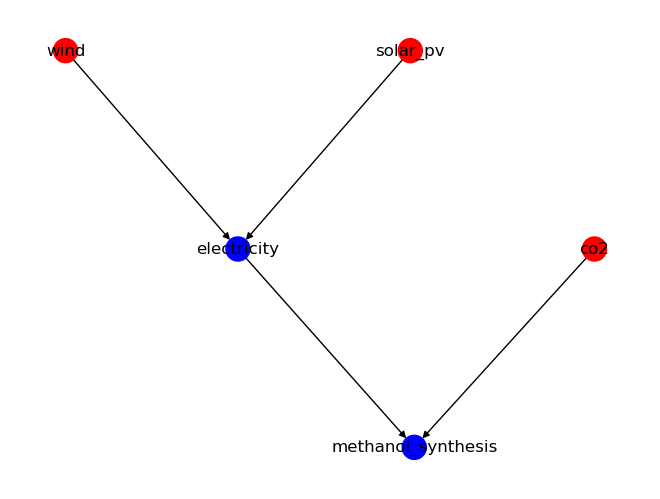

In [17]:
network.draw()

In [18]:
network.optimize('highs')

Running HiGHS 1.2.2 [date: 2022-09-04, git hash: 8701dbf19]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
26280 rows, 2 cols, 52560 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-236520); columns 0(-131403); elements 0(-499320) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  3.0000160000e+01
HiGHS run time      :          0.38


In [19]:
network.optimize('gurobi')

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 236520 rows, 131403 columns and 499320 nonzeros
Model fingerprint: 0x34cdeb91
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [8e-06, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 5e+00]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 236520 rows and 131403 columns
Presolve time: 0.27s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0000160e+01   0.000000e+00   0.000000e+00      0s

Solved with dual simplex
Solved in 0 iterations and 0.49 seconds (0.23 work units)
Optimal objective  3.000016000e+01


In [20]:
network.model.solution

<xarray.Dataset>
Dimensions:                              (time: 8760, locations: 3)
Coordinates:
  * time                                 (time) int64 0 1 2 3 ... 8757 8758 8759
  * locations                            (locations) int64 0 1 2
Data variables:
    size_wind                            float64 30.0
    size_solar_pv                        float64 0.0
    flow_solar_pv_electricity            (time, locations) float64 0.0 ... 0.0
    flow_wind_electricity                (time, locations) float64 15.0 ... 15.0
    flow_co2_methanol_synthesis          (time, locations) float64 5.0 ... 5.0
    flow_electricity_methanol_synthesis  (time, locations) float64 15.0 ... 15.0
    size_methanol_synthesis              float64 20.0
    flow_methanol_synthesis              (time, locations) float64 20.0 ... 20.0